In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [3]:
dataset = pandas.read_csv('Desktop/uber_raw_data_apr14.csv')

### Converting Date/Time

In [12]:
dataset['Date/Time'] = dataset['Date/Time'].map(pandas.to_datetime)

In [13]:
def get_dom(dt):
    return dt.day

dataset['dom'] = dataset['Date/Time'].map(get_dom) 

In [28]:
dataset.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [29]:
def get_weekday(dt):
    return dt.weekday()

dataset['Weekday'] = dataset['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

dataset['Hour'] = dataset['Date/Time'].map(get_hour)

In [30]:
dataset.tail()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

# Analyzing DoM

Text(0.5, 1.0, 'Frequency analysis of DoM - Uber Data (14th April) ')

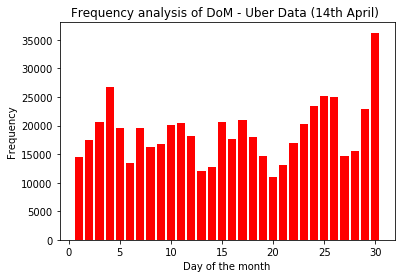

In [46]:
hist(dataset.dom , bins=30 , rwidth=0.8 , range = (0.5 , 30.5) , color = 'red')
xlabel('Day of the month')
ylabel('Frequency')
title('Frequency analysis of DoM - Uber Data (14th April) ')


In [63]:
def count_for_dom(rows):
    return len(rows)

bydate = dataset.groupby('dom').apply(count_for_dom)
bydate

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

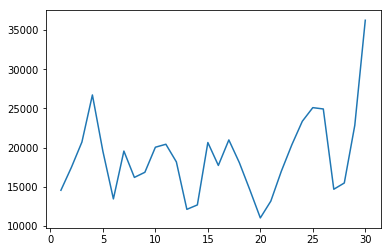

In [64]:
plot(bydate)

## Sorting the DoM values and plotting

In [66]:
bydate_sorted = bydate.sort_values()
bydate_sorted


dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5, 1.0, 'Sorted Frequency analysis of DoM - Uber Data (14th April) ')

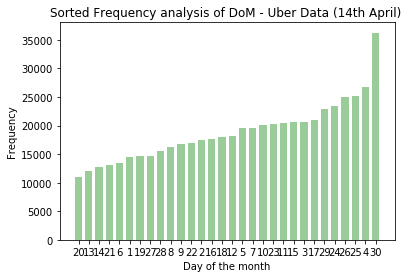

In [87]:
bar(range(1,31) , bydate_sorted , width=0.7 , color='green' , alpha=0.4)
xticks(range(1,31) , bydate_sorted.index);
xlabel('Day of the month')
ylabel('Frequency')
title('Sorted Frequency analysis of DoM - Uber Data (14th April) ')

## Analyze Weekdays

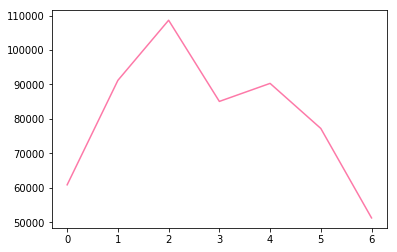

In [104]:
def count_for_weekdays(rows):
    return len(rows)

byweekday = dataset.groupby('Weekday').apply(count_for_weekdays)
byweekday

plot(byweekday , color='#fd79a8')

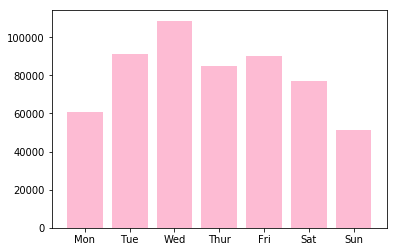

In [105]:
bar(range(7) ,byweekday , color='#fd79a8' , alpha = 0.5)
xticks(range(7) ,'Mon Tue Wed Thur Fri Sat Sun'.split());

## Analyze hours

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

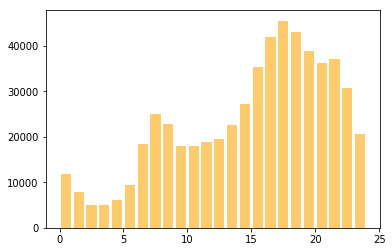

In [124]:
hist(dataset.Hour ,bins=24,range=(0,24),rwidth=0.8 , color='#fdcb6e' )

# Cross Analysis ( Weekday and Hour )

In [137]:
cross_analysis = dataset.groupby('Weekday Hour'.split()).apply(count_for_weekdays).unstack()
cross_analysis

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


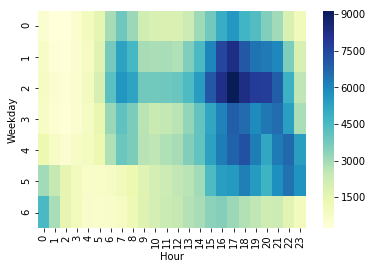

In [153]:
seaborn.heatmap(cross_analysis , cmap='YlGnBu' )


## Analysing Latitudes and Longitudes

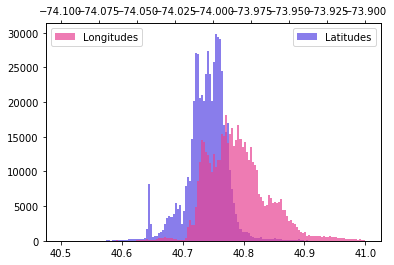

In [179]:
hist(dataset.Lat , bins=150 , range =(40.5 , 41), color='#6c5ce7' , alpha = 0.8 , label='Latitudes');
legend()
twiny()
hist(dataset.Lon , bins = 150 , range= (-74.1 , -73.9) , color='#e84393' , alpha = 0.7 , label='Longitudes');
legend(loc='upper left')


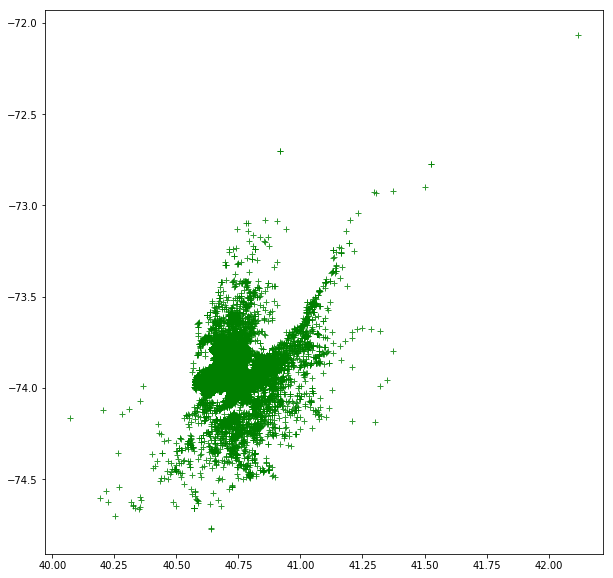

In [199]:
figure(figsize=(10,10))
plot(dataset.Lat , dataset.Lon , '+' , color='green' , alpha=0.8)
xlim =(40.5 , 41)
ylim = (-74.1 , -73.9)